In [1]:
import tensorflow as     tf
from   tensorflow import keras
import sklearn as sk

In [2]:
# TODO Split the GPU up into multiple GPUs?

In [3]:
# TODO Use the dataset's pre-fetch method?

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
fashion_mnist

<module 'keras.api._v2.keras.datasets.fashion_mnist' from '/home/kenso/.local/lib/python3.8/site-packages/keras/api/_v2/keras/datasets/fashion_mnist/__init__.py'>

In [6]:
validation_set_size     = 5000
maximum_pixel_intensity = 255.0

In [7]:
X_valid, X_train = X_train_full[:validation_set_size] / maximum_pixel_intensity, X_train_full[validation_set_size:] / maximum_pixel_intensity
y_valid, y_train = y_train_full[:validation_set_size], y_train_full[validation_set_size:]
X_test           = X_test / maximum_pixel_intensity

In [8]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [9]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

2021-10-26 20:28:23.800700: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-26 20:28:23.805818: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2021-10-26 20:28:23.805830: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1835] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2021-10-26 20:28:23.806057: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN

In [10]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

### `keras` Callbacks

#### `Checkpoint` Callback

In [11]:
# TODO Prepend the uploads directory and the broader path to this filename.

outfile_pathname  = 'MWSTORE:trained_model.h5' 
checkpoint_cb     = keras.callbacks.ModelCheckpoint(outfile_pathname, save_best_only=True)

#### `EarlyStopping` Callback

In [12]:
# TODO Make `patience` dynamic, according to the user-response to the question "How will it automatically stop training?" in the Electron app.

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10)

In [13]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])

2021-10-26 20:28:34.885646: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 172480000 exceeds 10% of free system memory.
2021-10-26 20:28:34.972220: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
1719/1719 [==============================] - 2s 936us/step - loss: 0.7194 - accuracy: 0.7620 - val_loss: 0.5258 - val_accuracy: 0.8122
Epoch 2/10
1719/1719 [==============================] - 2s 901us/step - loss: 0.4915 - accuracy: 0.8271 - val_loss: 0.4484 - val_accuracy: 0.8432
Epoch 3/10
1719/1719 [==============================] - 2s 878us/step - loss: 0.4454 - accuracy: 0.8442 - val_loss: 0.4105 - val_accuracy: 0.8648
Epoch 4/10
1719/1719 [==============================] - 2s 876us/step - loss: 0.4175 - accuracy: 0.8529 - val_loss: 0.4285 - val_accuracy: 0.8506
Epoch 5/10
1719/1719 [==============================] - 2s 884us/step - loss: 0.3992 - accuracy: 0.8587 - val_loss: 0.4086 - val_accuracy: 0.8596
Epoch 6/10
1719/1719 [==============================] - 2s 902us/step - loss: 0.3818 - accuracy: 0.8653 - val_loss: 0.3791 - val_accuracy: 0.8668
Epoch 7/10
1719/1719 [==============================] - 2s 888us/step - loss: 0.3687 - accuracy: 0.8684 - val_loss: 0.3868 -

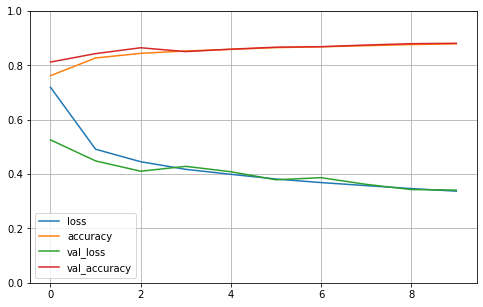

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show() #bp3